In [1]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random

In [2]:
execfile('ML_Challenge_data_preprocessing.py')

('Generated X with shape ', (347698, 1000))
('Generated y with shape ', (347698,))


In [3]:
first_seq_label, second_seq_label = [y[5],y[6]]
print 'First 2 lables are: ' + str(first_seq_label) + ' and ' + str(second_seq_label)

First 2 lables are: 0 and 0


In [4]:
execfile('edit_distance.py')
seq1, seq2 = X[5], X[6]
print 'Start of seq1: ' + str(seq1[0:5])
print 'Start of seq2: ' + str(seq2[0:5])

length = edit_distance(seq1, seq2)
print 'Length of longest common substring: ' + str(length)

Start of seq1: ['T' 'T' 'G' 'G' 'C']
Start of seq2: ['C' 'C' 'T' 'G' 'G']
Length of longest common substring: 10.0


In [5]:
num_pairs = 100
both_label0_seq_lengths = []
both_label1_seq_lengths = []
diff_labels_seq_lengths = []

# split into promotors and enhancers
promoter_idcs = (y == 0).nonzero()[0]
num_promoters = len(promoter_idcs)
enhancer_idcs = (y == 1).nonzero()[0]
num_enhancers = len(enhancer_idcs)
assert(num_promoters + num_enhancers == X.shape[0])
promoter_X = X[promoter_idcs,]
enhancer_X = X[enhancer_idcs,]
print promoter_X.shape
print enhancer_X.shape

(274299, 1000)
(73399, 1000)


In [16]:
def compute_scores(num_pairs, X1, X2):
    scores = []
    for i in range(num_pairs):
        if i % 10 == 0: print 'Evaluating pair ' + str(i)
        random_idx1 = int(random.random()*X1.shape[0])
        random_idx2 = int(random.random()*X2.shape[0])
        # although this doesn't matter if X1 != X2
        assert(random_idx1 != random_idx2)
        seq1 = X1[random_idx1]
        seq2 = X2[random_idx2]
        score = longest_common_substring_length(seq1, seq2)
        if i % 10 == 0: print 'Length: ' + str(score) + "\n"        
        scores.append(score)
    return scores

In [22]:
num_pairs = 100
both_label0_seq_scores = compute_scores(num_pairs, promoter_X, promoter_X)
print both_label0_seq_scores[0:10]

Evaluating pair 0
Length: 14.0

Evaluating pair 10
Length: 10.0

Evaluating pair 20
Length: 12.0

Evaluating pair 30
Length: 10.0

Evaluating pair 40
Length: 11.0

Evaluating pair 50
Length: 10.0

Evaluating pair 60
Length: 11.0

Evaluating pair 70
Length: 12.0

Evaluating pair 80
Length: 11.0

Evaluating pair 90
Length: 9.0

[14.0, 10.0, 9.0, 12.0, 10.0, 10.0, 12.0, 10.0, 9.0, 9.0]


In [23]:
both_label1_seq_scores = compute_scores(num_pairs, enhancer_X, enhancer_X)
print both_label1_seq_scores[0:10]

Evaluating pair 0
Length: 9.0

Evaluating pair 10
Length: 10.0

Evaluating pair 20
Length: 10.0

Evaluating pair 30
Length: 9.0

Evaluating pair 40
Length: 11.0

Evaluating pair 50
Length: 10.0

Evaluating pair 60
Length: 9.0

Evaluating pair 70
Length: 12.0

Evaluating pair 80
Length: 9.0

Evaluating pair 90
Length: 11.0

[9.0, 10.0, 13.0, 34.0, 10.0, 10.0, 11.0, 10.0, 9.0, 9.0]


In [24]:
diff_label_seq_scores = compute_scores(num_pairs, promoter_X, enhancer_X)
print diff_label_seq_scores[0:10]

Evaluating pair 0
Length: 9.0

Evaluating pair 10
Length: 11.0

Evaluating pair 20
Length: 10.0

Evaluating pair 30
Length: 12.0

Evaluating pair 40
Length: 13.0

Evaluating pair 50
Length: 8.0

Evaluating pair 60
Length: 10.0

Evaluating pair 70
Length: 11.0

Evaluating pair 80
Length: 8.0

Evaluating pair 90
Length: 10.0

[14.0, 10.0, 9.0, 12.0, 10.0, 10.0, 12.0, 10.0, 9.0, 9.0]


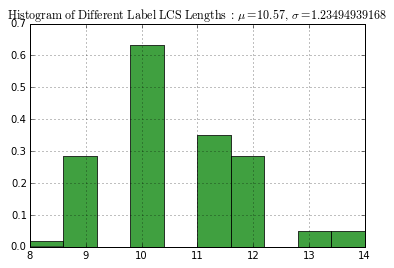

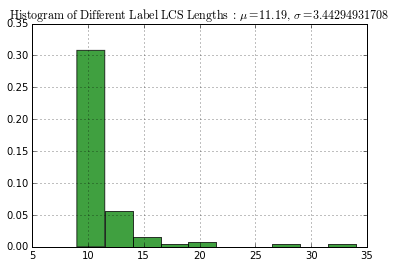

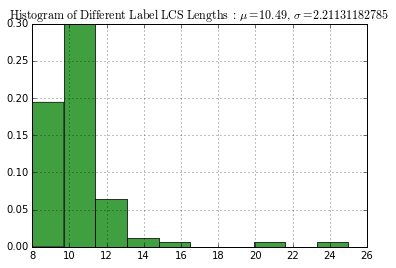

In [27]:
%matplotlib inline

def plot_lcs_lengths(seq_lengths):
    n, bins, patches = plt.hist(seq_lengths, 10, normed=1, facecolor='green', alpha=0.75)
    mu = np.mean(seq_lengths)
    sigma = np.std(seq_lengths)
    plt.title(r'$\mathrm{Histogram\ of\ Different\ Label\ LCS\ Lengths\ :}\ \mu='
              '' + str(mu) + ',\ \sigma=' + str(sigma) + '$')
    # Note: there is a value lower, ths has cut some extremes
    plt.grid(True)
    plt.show()

plot_lcs_lengths(both_label0_seq_scores)
plot_lcs_lengths(both_label1_seq_scores)
plot_lcs_lengths(diff_label_seq_scores)